In [9]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
df = fetch_california_housing(as_frame=True).frame

In [11]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [12]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
print(housing_data.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [14]:
X = housing_data.data
y = housing_data.target

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

In [16]:
np.random.seed(42)
theta = np.random.randn(X_b.shape[1], 1)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_b, y.reshape(-1, 1), theta, learning_rate, iterations)

print("Final Parameters:")
print(theta)

final_cost = compute_cost(X_b, y.reshape(-1, 1), theta)

Final Parameters:
[[ 2.06849031]
 [ 0.63664902]
 [ 0.19887237]
 [ 0.31674235]
 [-0.2716093 ]
 [ 0.02703838]
 [-0.04189199]
 [-0.4957905 ]
 [-0.4334429 ]]


In [17]:
from sklearn.metrics import r2_score, mean_squared_error

# Compute R-squared (R2)
y_pred = X_b.dot(theta)
r2 = r2_score(y, y_pred)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print evaluation metrics
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Final Cost (Mean Squared Error):", final_cost)

R-squared (R2): 0.5407310984589829
Root Mean Squared Error (RMSE): 0.7820100022794999
Final Cost (Mean Squared Error): 0.3057698218325917


NameError: name 'plt' is not defined

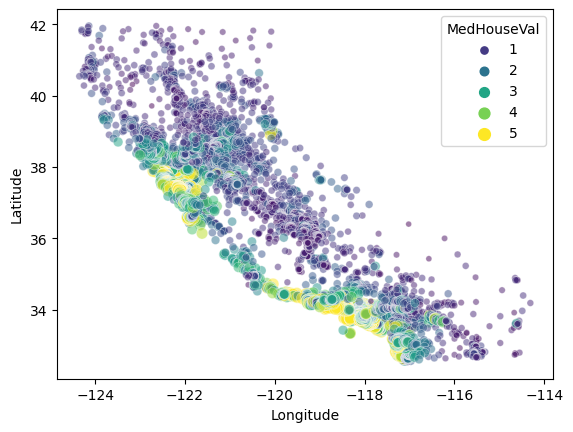

In [18]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")


In [30]:
housing_data.frame.info()

AttributeError: 'NoneType' object has no attribute 'info'